In [1]:
import requests

In [2]:
from bs4 import BeautifulSoup 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
site=requests.get("https://www.worldometers.info/coronavirus/")
print(site)

<Response [200]>


b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<li
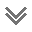

In [4]:
print(site.content)

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x
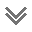

In [5]:
soup=BeautifulSoup(site.content,'html.parser')
print(soup.prettify())

In [6]:
table1= soup.find('table',id='main_table_countries_today')
table1

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br>Cases</br></th>
<th width="30">Serious,<br>Critical</br></th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="

In [7]:
headers=[]
for i in table1.find_all('th'):
    title=i.text
    headers.append(title)
print(headers)

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']


In [8]:
headers.index('Tests/\n1M pop\n')

13

In [9]:
headers[13]='Test/1M Population'
print(headers)

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Test/1M Population', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']


In [10]:
headers.index('Tot\xa0Cases/1M pop')

10

In [11]:
headers[10]='Total Cases/1M Pop'

In [12]:
headers.index('Serious,Critical')

9

In [13]:
headers[9]='Critical'
print(headers)

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Critical', 'Total Cases/1M Pop', 'Deaths/1M pop', 'TotalTests', 'Test/1M Population', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']


In [14]:
headers[1]='Country'
print(headers)

['#', 'Country', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Critical', 'Total Cases/1M Pop', 'Deaths/1M pop', 'TotalTests', 'Test/1M Population', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']


In [15]:
mydata=pd.DataFrame(columns=headers)
mydata

Empty DataFrame
Columns: [#, Country, TotalCases, NewCases, TotalDeaths, NewDeaths, TotalRecovered, NewRecovered, ActiveCases, Critical, Total Cases/1M Pop, Deaths/1M pop, TotalTests, Test/1M Population, Population, Continent, 1 Caseevery X ppl, 1 Deathevery X ppl, 1 Testevery X ppl, New Cases/1M pop, New Deaths/1M pop, Active Cases/1M pop]
Index: []

[0 rows x 22 columns]

In [16]:
for j in table1.find_all('tr')[1:]:
    row_data=j.find_all('td')
    row=[k.text for k in row_data]
    length=len(mydata)
    mydata.loc[length]=row
mydata

#             Country   TotalCases NewCases TotalDeaths NewDeaths  \
0       \nNorth America\n  130,616,105            1,667,677             
1                \nAsia\n  221,325,890     +314   1,552,599        +3   
2              \nEurope\n  252,895,301   +2,465   2,094,773       +94   
3       \nSouth America\n   69,529,432            1,364,391             
4             \nOceania\n   14,755,211               32,187             
..  ..                ...          ...      ...         ...       ...   
242                Total:   69,529,432            1,364,391             
243                Total:   14,755,211               32,187             
244                Total:   12,858,080              258,877             
245                Total:          721                   15             
246                Total:  701,980,740   +2,779   6,970,519       +97   

    TotalRecovered NewRecovered ActiveCases Critical  ... TotalTests  \
0      125,999,719                2,948,709    7,636  ...              
1      205,486,396       +3,441  14,286,895   14,765  ...              
2      248,196,804       +8,016   2,603,724    4,672  ...              
3       66,595,363                1,569,678    8,953  ...              
4       14,540,424                  182,600       54  ...              
..             ...          ...         ...      ...  ...        ...   
242     66,595,363                1,569,678    8,953  ...              
243     14,540,424                  182,600       54  ...              
244     12,089,889                  509,314      529  ...              
245            706                        0        0  ...              
246    672,909,301      +11,215  22,100,920   36,609  ...              

    Test/1M Population Population          Continent 1 Caseevery X ppl  \
0                                      North America                \n   
1                                               Asia                \n   
2                                             Europe                \n   
3                                      South America                \n   
4                                  Australia/Oceania                \n   
..                 ...        ...                ...               ...   
242                                    South America                     
243                                Australia/Oceania                     
244                                           Africa                     
245                                                                      
246                                              All                \n   

    1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop New Deaths/1M pop  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4                                                                             
..                 ...               ...              ...               ...   
242                                                                           
243                                                                           
244                                                                           
245                                                                           
246                                                                           

    Active Cases/1M pop  
0                        
1                        
2                        
3                        
4                        
..                  ...  
242                      
243                      
244                      
245                      
246                      

[247 rows x 22 columns]

In [17]:
mydata.drop(mydata.index[0:7],inplace=True)
mydata.drop(mydata.index[222:229],inplace=True)

In [18]:
mydata.drop('#',inplace=True,axis=1)

In [19]:
mydata

Country   TotalCases NewCases                                TotalDeaths  \
7      World  701,980,740   +2,779                                  6,970,519   
8        USA  110,610,761           1,192,813                                   
9      India   45,022,793     +305    533,423                                   
10    France   40,138,560             167,642                                   
11   Germany   38,796,602   +1,250    181,284                                   
..       ...          ...      ...                                        ...   
242   Total:   69,529,432                                           1,364,391   
243   Total:   14,755,211                                              32,187   
244   Total:   12,858,080                                             258,877   
245   Total:          721                                                  15   
246   Total:  701,980,740   +2,779                                  6,970,519   

    NewDeaths TotalRecovered NewRecovered ActiveCases Critical  \
7         +97    672,909,301      +11,215  22,100,920   36,609   
8                108,250,739                1,167,209    2,481   
9          +3            N/A          N/A         N/A      N/A   
10                39,970,918                        0            
11        +79     38,240,600                  374,718      N/A   
..        ...            ...          ...         ...      ...   
242               66,595,363                1,569,678    8,953   
243               14,540,424                  182,600       54   
244               12,089,889                  509,314      529   
245                      706                        0        0   
246       +97    672,909,301      +11,215  22,100,920   36,609   

    Total Cases/1M Pop  ...     TotalTests Test/1M Population      Population  \
7               90,058  ...                                                     
8              330,373  ...  1,186,623,278          3,544,219    334,805,269    
9               32,008  ...    935,879,495            665,334  1,406,631,776    
10             612,013  ...    271,490,188          4,139,547     65,584,518    
11             462,505  ...    122,332,384          1,458,359     83,883,596    
..                 ...  ...            ...                ...             ...   
242                     ...                                                     
243                     ...                                                     
244                     ...                                                     
245                     ...                                                     
246           90,057.6  ...                                                     

             Continent 1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl  \
7                  All                \n                                        
8        North America                 3                281                 0   
9                 Asia                31              2,637                 2   
10              Europe                 2                391                 0   
11              Europe                 2                463                 1   
..                 ...               ...                ...               ...   
242      South America                                                          
243  Australia/Oceania                                                          
244             Africa                                                          
245                                                                             
246                All                \n                                        

    New Cases/1M pop New Deaths/1M pop Active Cases/1M pop  
7                                                           
8                                                    3,486  
9                0.2                                     2  
10                                               

In [20]:
mydata.reset_index(inplace=True,drop=True)

In [21]:
mydata

Country   TotalCases NewCases                                TotalDeaths  \
0      World  701,980,740   +2,779                                  6,970,519   
1        USA  110,610,761           1,192,813                                   
2      India   45,022,793     +305    533,423                                   
3     France   40,138,560             167,642                                   
4    Germany   38,796,602   +1,250    181,284                                   
..       ...          ...      ...                                        ...   
228   Total:   69,529,432                                           1,364,391   
229   Total:   14,755,211                                              32,187   
230   Total:   12,858,080                                             258,877   
231   Total:          721                                                  15   
232   Total:  701,980,740   +2,779                                  6,970,519   

    NewDeaths TotalRecovered NewRecovered ActiveCases Critical  \
0         +97    672,909,301      +11,215  22,100,920   36,609   
1                108,250,739                1,167,209    2,481   
2          +3            N/A          N/A         N/A      N/A   
3                 39,970,918                        0            
4         +79     38,240,600                  374,718      N/A   
..        ...            ...          ...         ...      ...   
228               66,595,363                1,569,678    8,953   
229               14,540,424                  182,600       54   
230               12,089,889                  509,314      529   
231                      706                        0        0   
232       +97    672,909,301      +11,215  22,100,920   36,609   

    Total Cases/1M Pop  ...     TotalTests Test/1M Population      Population  \
0               90,058  ...                                                     
1              330,373  ...  1,186,623,278          3,544,219    334,805,269    
2               32,008  ...    935,879,495            665,334  1,406,631,776    
3              612,013  ...    271,490,188          4,139,547     65,584,518    
4              462,505  ...    122,332,384          1,458,359     83,883,596    
..                 ...  ...            ...                ...             ...   
228                     ...                                                     
229                     ...                                                     
230                     ...                                                     
231                     ...                                                     
232           90,057.6  ...                                                     

             Continent 1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl  \
0                  All                \n                                        
1        North America                 3                281                 0   
2                 Asia                31              2,637                 2   
3               Europe                 2                391                 0   
4               Europe                 2                463                 1   
..                 ...               ...                ...               ...   
228      South America                                                          
229  Australia/Oceania                                                          
230             Africa                                                          
231                                                                             
232                All                \n                                        

    New Cases/1M pop New Deaths/1M pop Active Cases/1M pop  
0                                                           
1                                                    3,486  
2                0.2                                     2  
3                                                

In [22]:
mydata.tail(10)

Country   TotalCases NewCases                            TotalDeaths  \
223  MS Zaandam            9               2                                   
224       China      503,302           5,272                                   
225      Total:  130,616,105                                       1,667,677   
226      Total:  221,325,890     +314                              1,552,599   
227      Total:  252,895,301   +2,465                              2,094,773   
228      Total:   69,529,432                                       1,364,391   
229      Total:   14,755,211                                          32,187   
230      Total:   12,858,080                                         258,877   
231      Total:          721                                              15   
232      Total:  701,980,740   +2,779                              6,970,519   

    NewDeaths TotalRecovered NewRecovered ActiveCases Critical  \
223                        7                        0            
224                  379,053                  118,977      N/A   
225              125,999,719                2,948,709    7,636   
226        +3    205,486,396       +3,441  14,286,895   14,765   
227       +94    248,196,804       +8,016   2,603,724    4,672   
228               66,595,363                1,569,678    8,953   
229               14,540,424                  182,600       54   
230               12,089,889                  509,314      529   
231                      706                        0        0   
232       +97    672,909,301      +11,215  22,100,920   36,609   

    Total Cases/1M Pop  ...   TotalTests Test/1M Population  \
223                     ...                                   
224                347  ...  160,000,000            110,461   
225                     ...                                   
226                     ...                                   
227                     ...                                   
228                     ...                                   
229                     ...                                   
230                     ...                                   
231                     ...                                   
232           90,057.6  ...                                   

                                        Population          Continent  \
223                                                                     
224  1,448,471,400                                               Asia   
225                                                     North America   
226                                                              Asia   
227                                                            Europe   
228                                                     South America   
229                                                 Australia/Oceania   
230                                                            Africa   
231                                                                     
232                                                               All   

    1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
223                                                                           
224             2,878            274,748                 9                    
225                                                                           
226                                                                           
227                                                                           
228                                                                           
229                                                                           
230                                                                           
231                                                                           
232                \n                                                         

    New Deaths/1M pop Active Cas

In [23]:
mydata.drop(mydata.index[225:],inplace=True)
mydata

Country   TotalCases NewCases  \
0                    World  701,980,740   +2,779   
1                      USA  110,610,761            
2                    India   45,022,793     +305   
3                   France   40,138,560            
4                  Germany   38,796,602   +1,250   
..                     ...          ...      ...   
220  Saint Pierre Miquelon        3,452            
221                 Tuvalu        2,943            
222         Western Sahara           10            
223             MS Zaandam            9            
224                  China      503,302            

                                   TotalDeaths NewDeaths TotalRecovered  \
0                                    6,970,519       +97    672,909,301   
1    1,192,813                                              108,250,739   
2      533,423                                        +3            N/A   
3      167,642                                               39,970,918   
4      181,284                                       +79     38,240,600   
..                                         ...       ...            ...   
220          2                                                    2,449   
221          1                                                      N/A   
222          1                                                        9   
223          2                                                        7   
224      5,272                                                  379,053   

    NewRecovered ActiveCases Critical Total Cases/1M Pop  ...     TotalTests  \
0        +11,215  22,100,920   36,609             90,058  ...                  
1                  1,167,209    2,481            330,373  ...  1,186,623,278   
2            N/A         N/A      N/A             32,008  ...    935,879,495   
3                          0                     612,013  ...    271,490,188   
4                    374,718      N/A            462,505  ...    122,332,384   
..           ...         ...      ...                ...  ...            ...   
220                    1,001                     599,410  ...         25,400   
221          N/A         N/A      N/A            243,909  ...                  
222                        0                          16  ...                  
223                        0                              ...                  
224                  118,977      N/A                347  ...    160,000,000   

    Test/1M Population                                     Population  \
0                                                                       
1            3,544,219                                   334,805,269    
2              665,334                                 1,406,631,776    
3            4,139,547                                    65,584,518    
4            1,458,359                                    83,883,596    
..                 ...                                            ...   
220          4,410,488                                         5,759    
221                                                           12,066    
222                                                          626,161    
223                                                                     
224            110,461  1,448,471,400                                   

             Continent 1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl  \
0                  All                \n                                        
1        North America                 3                281                 0   
2                 Asia                31              2,637                 2   
3               Europe                 2                391                 0   
4               Europe                 2                463                 1   
..                 ...               ...                ...               ...   
220      North America                 2              2,880                 0   
221  Au

In [25]:
mydata.drop(index=0,inplace=True)
mydata

Country   TotalCases NewCases  \
1                      USA  110,610,761            
2                    India   45,022,793     +305   
3                   France   40,138,560            
4                  Germany   38,796,602   +1,250   
5                   Brazil   38,230,814            
..                     ...          ...      ...   
220  Saint Pierre Miquelon        3,452            
221                 Tuvalu        2,943            
222         Western Sahara           10            
223             MS Zaandam            9            
224                  China      503,302            

                                   TotalDeaths NewDeaths TotalRecovered  \
1    1,192,813                                              108,250,739   
2      533,423                                        +3            N/A   
3      167,642                                               39,970,918   
4      181,284                                       +79     38,240,600   
5      708,739                                               36,249,161   
..                                         ...       ...            ...   
220          2                                                    2,449   
221          1                                                      N/A   
222          1                                                        9   
223          2                                                        7   
224      5,272                                                  379,053   

    NewRecovered ActiveCases Critical Total Cases/1M Pop  ...     TotalTests  \
1                  1,167,209    2,481            330,373  ...  1,186,623,278   
2            N/A         N/A      N/A             32,008  ...    935,879,495   
3                          0                     612,013  ...    271,490,188   
4                    374,718      N/A            462,505  ...    122,332,384   
5                  1,272,914      N/A            177,526  ...     63,776,166   
..           ...         ...      ...                ...  ...            ...   
220                    1,001                     599,410  ...         25,400   
221          N/A         N/A      N/A            243,909  ...                  
222                        0                          16  ...                  
223                        0                              ...                  
224                  118,977      N/A                347  ...    160,000,000   

    Test/1M Population                                     Population  \
1            3,544,219                                   334,805,269    
2              665,334                                 1,406,631,776    
3            4,139,547                                    65,584,518    
4            1,458,359                                    83,883,596    
5              296,146                                   215,353,593    
..                 ...                                            ...   
220          4,410,488                                         5,759    
221                                                           12,066    
222                                                          626,161    
223                                                                     
224            110,461  1,448,471,400                                   

             Continent 1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl  \
1        North America                 3                281                 0   
2                 Asia                31              2,637                 2   
3               Europe                 2                391                 0   
4               Europe                 2                463                 1   
5        South America                 6                304                 3   
..                 ...               ...                ...               ...   
220      North America                 2              2,880                 0   
221  Au

In [26]:
mydata.reset_index(inplace=True,drop=True)
mydata

Country   TotalCases NewCases  \
0                      USA  110,610,761            
1                    India   45,022,793     +305   
2                   France   40,138,560            
3                  Germany   38,796,602   +1,250   
4                   Brazil   38,230,814            
..                     ...          ...      ...   
219  Saint Pierre Miquelon        3,452            
220                 Tuvalu        2,943            
221         Western Sahara           10            
222             MS Zaandam            9            
223                  China      503,302            

                                   TotalDeaths NewDeaths TotalRecovered  \
0    1,192,813                                              108,250,739   
1      533,423                                        +3            N/A   
2      167,642                                               39,970,918   
3      181,284                                       +79     38,240,600   
4      708,739                                               36,249,161   
..                                         ...       ...            ...   
219          2                                                    2,449   
220          1                                                      N/A   
221          1                                                        9   
222          2                                                        7   
223      5,272                                                  379,053   

    NewRecovered ActiveCases Critical Total Cases/1M Pop  ...     TotalTests  \
0                  1,167,209    2,481            330,373  ...  1,186,623,278   
1            N/A         N/A      N/A             32,008  ...    935,879,495   
2                          0                     612,013  ...    271,490,188   
3                    374,718      N/A            462,505  ...    122,332,384   
4                  1,272,914      N/A            177,526  ...     63,776,166   
..           ...         ...      ...                ...  ...            ...   
219                    1,001                     599,410  ...         25,400   
220          N/A         N/A      N/A            243,909  ...                  
221                        0                          16  ...                  
222                        0                              ...                  
223                  118,977      N/A                347  ...    160,000,000   

    Test/1M Population                                     Population  \
0            3,544,219                                   334,805,269    
1              665,334                                 1,406,631,776    
2            4,139,547                                    65,584,518    
3            1,458,359                                    83,883,596    
4              296,146                                   215,353,593    
..                 ...                                            ...   
219          4,410,488                                         5,759    
220                                                           12,066    
221                                                          626,161    
222                                                                     
223            110,461  1,448,471,400                                   

             Continent 1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl  \
0        North America                 3                281                 0   
1                 Asia                31              2,637                 2   
2               Europe                 2                391                 0   
3               Europe                 2                463                 1   
4        South America                 6                304                 3   
..                 ...               ...                ...               ...   
219      North America                 2              2,880                 0   
220  Au

In [27]:
Covid_Data=mydata.copy()

In [28]:
Covid_Data

Country   TotalCases NewCases  \
0                      USA  110,610,761            
1                    India   45,022,793     +305   
2                   France   40,138,560            
3                  Germany   38,796,602   +1,250   
4                   Brazil   38,230,814            
..                     ...          ...      ...   
219  Saint Pierre Miquelon        3,452            
220                 Tuvalu        2,943            
221         Western Sahara           10            
222             MS Zaandam            9            
223                  China      503,302            

                                   TotalDeaths NewDeaths TotalRecovered  \
0    1,192,813                                              108,250,739   
1      533,423                                        +3            N/A   
2      167,642                                               39,970,918   
3      181,284                                       +79     38,240,600   
4      708,739                                               36,249,161   
..                                         ...       ...            ...   
219          2                                                    2,449   
220          1                                                      N/A   
221          1                                                        9   
222          2                                                        7   
223      5,272                                                  379,053   

    NewRecovered ActiveCases Critical Total Cases/1M Pop  ...     TotalTests  \
0                  1,167,209    2,481            330,373  ...  1,186,623,278   
1            N/A         N/A      N/A             32,008  ...    935,879,495   
2                          0                     612,013  ...    271,490,188   
3                    374,718      N/A            462,505  ...    122,332,384   
4                  1,272,914      N/A            177,526  ...     63,776,166   
..           ...         ...      ...                ...  ...            ...   
219                    1,001                     599,410  ...         25,400   
220          N/A         N/A      N/A            243,909  ...                  
221                        0                          16  ...                  
222                        0                              ...                  
223                  118,977      N/A                347  ...    160,000,000   

    Test/1M Population                                     Population  \
0            3,544,219                                   334,805,269    
1              665,334                                 1,406,631,776    
2            4,139,547                                    65,584,518    
3            1,458,359                                    83,883,596    
4              296,146                                   215,353,593    
..                 ...                                            ...   
219          4,410,488                                         5,759    
220                                                           12,066    
221                                                          626,161    
222                                                                     
223            110,461  1,448,471,400                                   

             Continent 1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl  \
0        North America                 3                281                 0   
1                 Asia                31              2,637                 2   
2               Europe                 2                391                 0   
3               Europe                 2                463                 1   
4        South America                 6                304                 3   
..                 ...               ...                ...               ...   
219      North America                 2              2,880                 0   
220  Au

In [29]:
mydata.to_csv('Covid Data.csv',index=False)

In [30]:
mydata1=pd.read_csv('Covid Data.csv')
mydata1

Country   TotalCases NewCases  \
0                      USA  110,610,761      NaN   
1                    India   45,022,793     +305   
2                   France   40,138,560      NaN   
3                  Germany   38,796,602   +1,250   
4                   Brazil   38,230,814      NaN   
..                     ...          ...      ...   
219  Saint Pierre Miquelon        3,452      NaN   
220                 Tuvalu        2,943      NaN   
221         Western Sahara           10      NaN   
222             MS Zaandam            9      NaN   
223                  China      503,302      NaN   

                                   TotalDeaths  NewDeaths TotalRecovered  \
0    1,192,813                                        NaN    108,250,739   
1      533,423                                        3.0            NaN   
2      167,642                                        NaN     39,970,918   
3      181,284                                       79.0     38,240,600   
4      708,739                                        NaN     36,249,161   
..                                         ...        ...            ...   
219          2                                        NaN          2,449   
220          1                                        NaN            NaN   
221          1                                        NaN              9   
222          2                                        NaN              7   
223      5,272                                        NaN        379,053   

    NewRecovered ActiveCases Critical Total Cases/1M Pop  ...     TotalTests  \
0            NaN   1,167,209    2,481            330,373  ...  1,186,623,278   
1            NaN         NaN      NaN             32,008  ...    935,879,495   
2            NaN           0      NaN            612,013  ...    271,490,188   
3            NaN     374,718      NaN            462,505  ...    122,332,384   
4            NaN   1,272,914      NaN            177,526  ...     63,776,166   
..           ...         ...      ...                ...  ...            ...   
219          NaN       1,001      NaN            599,410  ...         25,400   
220          NaN         NaN      NaN            243,909  ...            NaN   
221          NaN           0      NaN                 16  ...            NaN   
222          NaN           0      NaN                NaN  ...            NaN   
223          NaN     118,977      NaN                347  ...    160,000,000   

    Test/1M Population                                     Population  \
0            3,544,219                                   334,805,269    
1              665,334                                 1,406,631,776    
2            4,139,547                                    65,584,518    
3            1,458,359                                    83,883,596    
4              296,146                                   215,353,593    
..                 ...                                            ...   
219          4,410,488                                         5,759    
220                NaN                                        12,066    
221                NaN                                       626,161    
222                NaN                                                  
223            110,461  1,448,471,400                                   

             Continent 1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl  \
0        North America                 3                281               0.0   
1                 Asia                31              2,637               2.0   
2               Europe                 2                391               0.0   
3               Europe                 2                463               1.0   
4        South America                 6                304               3.0   
..                 ...               ...                ...               ...   
219      North America                 2              2,880               0.

In [33]:
Covid_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              224 non-null    object
 1   TotalCases           224 non-null    object
 2   NewCases             224 non-null    object
 3   TotalDeaths          224 non-null    object
 4   NewDeaths            224 non-null    object
 5   TotalRecovered       224 non-null    object
 6   NewRecovered         224 non-null    object
 7   ActiveCases          224 non-null    object
 8   Critical             224 non-null    object
 9   Total Cases/1M Pop   224 non-null    object
 10  Deaths/1M pop        224 non-null    object
 11  TotalTests           224 non-null    object
 12  Test/1M Population   224 non-null    object
 13  Population           224 non-null    object
 14  Continent            224 non-null    object
 15  1 Caseevery X ppl    224 non-null    object
 16  1 Deathe

In [34]:
Covid_Data.drop(['1 Caseevery X ppl','1 Deathevery X ppl','1 Testevery X ppl','New Cases/1M pop','New Deaths/1M pop',
                 'New Deaths/1M pop','Active Cases/1M pop','NewCases','NewDeaths','NewRecovered'],axis=1,inplace=True)
Covid_Data

Country   TotalCases  \
0                      USA  110,610,761   
1                    India   45,022,793   
2                   France   40,138,560   
3                  Germany   38,796,602   
4                   Brazil   38,230,814   
..                     ...          ...   
219  Saint Pierre Miquelon        3,452   
220                 Tuvalu        2,943   
221         Western Sahara           10   
222             MS Zaandam            9   
223                  China      503,302   

                                   TotalDeaths TotalRecovered ActiveCases  \
0    1,192,813                                    108,250,739   1,167,209   
1      533,423                                            N/A         N/A   
2      167,642                                     39,970,918           0   
3      181,284                                     38,240,600     374,718   
4      708,739                                     36,249,161   1,272,914   
..                                         ...            ...         ...   
219          2                                          2,449       1,001   
220          1                                            N/A         N/A   
221          1                                              9           0   
222          2                                              7           0   
223      5,272                                        379,053     118,977   

    Critical Total Cases/1M Pop Deaths/1M pop     TotalTests  \
0      2,481            330,373         3,563  1,186,623,278   
1        N/A             32,008           379    935,879,495   
2                       612,013         2,556    271,490,188   
3        N/A            462,505         2,161    122,332,384   
4        N/A            177,526         3,291     63,776,166   
..       ...                ...           ...            ...   
219                     599,410           347         25,400   
220      N/A            243,909            83                  
221                          16             2                  
222                                                            
223      N/A                347             4    160,000,000   

    Test/1M Population                                     Population  \
0            3,544,219                                   334,805,269    
1              665,334                                 1,406,631,776    
2            4,139,547                                    65,584,518    
3            1,458,359                                    83,883,596    
4              296,146                                   215,353,593    
..                 ...                                            ...   
219          4,410,488                                         5,759    
220                                                           12,066    
221                                                          626,161    
222                                                                     
223            110,461  1,448,471,400                                   

             Continent  
0        North America  
1                 Asia  
2               Europe  
3               Europe  
4        South America  
..                 ...  
219      North America  
220  Australia/Oceania  
221             Africa  
222                     
223               Asia  

[224 rows x 12 columns]

In [35]:
Covid_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             224 non-null    object
 1   TotalCases          224 non-null    object
 2   TotalDeaths         224 non-null    object
 3   TotalRecovered      224 non-null    object
 4   ActiveCases         224 non-null    object
 5   Critical            224 non-null    object
 6   Total Cases/1M Pop  224 non-null    object
 7   Deaths/1M pop       224 non-null    object
 8   TotalTests          224 non-null    object
 9   Test/1M Population  224 non-null    object
 10  Population          224 non-null    object
 11  Continent           224 non-null    object
dtypes: object(12)
memory usage: 21.1+ KB


In [36]:
import numpy as np

In [37]:
Covid_Data['TotalDeaths'].replace('N/A',np.nan,inplace=True)
Covid_Data['TotalRecovered'].replace('N/A',np.nan,inplace=True)
Covid_Data['ActiveCases'].replace('N/A',np.nan,inplace=True)
Covid_Data['Critical'].replace('N/A',np.nan,inplace=True)
Covid_Data['Deaths/1M pop'].replace('N/A',np.nan,inplace=True)
Covid_Data['TotalTests'].replace('N/A',np.nan,inplace=True)
Covid_Data['Test/1M Population'].replace('N/A',np.nan,inplace=True)
Covid_Data['Total Cases/1M Pop'].replace('N/A',np.nan,inplace=True)

In [38]:
Covid_Data['TotalCases']=Covid_Data['TotalCases'].str.replace(',','').astype('int')
Covid_Data['TotalDeaths']=Covid_Data['TotalDeaths'].str.replace(',','').astype('int')
Covid_Data['TotalRecovered']=Covid_Data['TotalRecovered'].str.replace(',','').astype('float')
Covid_Data['ActiveCases']=Covid_Data['ActiveCases'].str.replace(',','').astype('float')

In [39]:
Covid_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             224 non-null    object 
 1   TotalCases          224 non-null    int32  
 2   TotalDeaths         224 non-null    int32  
 3   TotalRecovered      176 non-null    float64
 4   ActiveCases         176 non-null    float64
 5   Critical            164 non-null    object 
 6   Total Cases/1M Pop  224 non-null    object 
 7   Deaths/1M pop       224 non-null    object 
 8   TotalTests          224 non-null    object 
 9   Test/1M Population  224 non-null    object 
 10  Population          224 non-null    object 
 11  Continent           224 non-null    object 
dtypes: float64(2), int32(2), object(8)
memory usage: 19.4+ KB


In [40]:
Covid_Data['Critical'].replace('',np.nan,inplace=True)

In [41]:
Covid_Data['Critical'].fillna(0,inplace=True)
Covid_Data

Country  TotalCases  TotalDeaths  TotalRecovered  \
0                      USA   110610761      1192813     108250739.0   
1                    India    45022793       533423             NaN   
2                   France    40138560       167642      39970918.0   
3                  Germany    38796602       181284      38240600.0   
4                   Brazil    38230814       708739      36249161.0   
..                     ...         ...          ...             ...   
219  Saint Pierre Miquelon        3452            2          2449.0   
220                 Tuvalu        2943            1             NaN   
221         Western Sahara          10            1             9.0   
222             MS Zaandam           9            2             7.0   
223                  China      503302         5272        379053.0   

     ActiveCases Critical Total Cases/1M Pop Deaths/1M pop     TotalTests  \
0      1167209.0    2,481            330,373         3,563  1,186,623,278   
1            NaN        0             32,008           379    935,879,495   
2            0.0        0            612,013         2,556    271,490,188   
3       374718.0        0            462,505         2,161    122,332,384   
4      1272914.0        0            177,526         3,291     63,776,166   
..           ...      ...                ...           ...            ...   
219       1001.0        0            599,410           347         25,400   
220          NaN        0            243,909            83                  
221          0.0        0                 16             2                  
222          0.0        0                                                   
223     118977.0        0                347             4    160,000,000   

    Test/1M Population                                     Population  \
0            3,544,219                                   334,805,269    
1              665,334                                 1,406,631,776    
2            4,139,547                                    65,584,518    
3            1,458,359                                    83,883,596    
4              296,146                                   215,353,593    
..                 ...                                            ...   
219          4,410,488                                         5,759    
220                                                           12,066    
221                                                          626,161    
222                                                                     
223            110,461  1,448,471,400                                   

             Continent  
0        North America  
1                 Asia  
2               Europe  
3               Europe  
4        South America  
..                 ...  
219      North America  
220  Australia/Oceania  
221             Africa  
222                     
223               Asia  

[224 rows x 12 columns]

In [42]:
Covid_Data['Critical']=Covid_Data['Critical'].str.replace(',','').astype('float')

In [43]:
Covid_Data['Total Cases/1M Pop'].replace('',np.nan,inplace=True)

In [44]:
Covid_Data['Total Cases/1M Pop']=Covid_Data['Total Cases/1M Pop'].str.replace(',','').astype('float')

In [45]:
Covid_Data['Total Cases/1M Pop'].fillna(Covid_Data['Total Cases/1M Pop'].mean(),inplace=True)
Covid_Data

Country  TotalCases  TotalDeaths  TotalRecovered  \
0                      USA   110610761      1192813     108250739.0   
1                    India    45022793       533423             NaN   
2                   France    40138560       167642      39970918.0   
3                  Germany    38796602       181284      38240600.0   
4                   Brazil    38230814       708739      36249161.0   
..                     ...         ...          ...             ...   
219  Saint Pierre Miquelon        3452            2          2449.0   
220                 Tuvalu        2943            1             NaN   
221         Western Sahara          10            1             9.0   
222             MS Zaandam           9            2             7.0   
223                  China      503302         5272        379053.0   

     ActiveCases  Critical  Total Cases/1M Pop Deaths/1M pop     TotalTests  \
0      1167209.0    2481.0       330373.000000         3,563  1,186,623,278   
1            NaN       NaN        32008.000000           379    935,879,495   
2            0.0       NaN       612013.000000         2,556    271,490,188   
3       374718.0       NaN       462505.000000         2,161    122,332,384   
4      1272914.0       NaN       177526.000000         3,291     63,776,166   
..           ...       ...                 ...           ...            ...   
219       1001.0       NaN       599410.000000           347         25,400   
220          NaN       NaN       243909.000000            83                  
221          0.0       NaN           16.000000             2                  
222          0.0       NaN       199206.726457                                
223     118977.0       NaN          347.000000             4    160,000,000   

    Test/1M Population                                     Population  \
0            3,544,219                                   334,805,269    
1              665,334                                 1,406,631,776    
2            4,139,547                                    65,584,518    
3            1,458,359                                    83,883,596    
4              296,146                                   215,353,593    
..                 ...                                            ...   
219          4,410,488                                         5,759    
220                                                           12,066    
221                                                          626,161    
222                                                                     
223            110,461  1,448,471,400                                   

             Continent  
0        North America  
1                 Asia  
2               Europe  
3               Europe  
4        South America  
..                 ...  
219      North America  
220  Australia/Oceania  
221             Africa  
222                     
223               Asia  

[224 rows x 12 columns]

In [46]:
Covid_Data['Deaths/1M pop'].replace('',np.nan,inplace=True)

In [47]:
Covid_Data['Deaths/1M pop']=Covid_Data['Deaths/1M pop'].str.replace(',','').astype('float')

In [48]:
Covid_Data['Deaths/1M pop'].fillna(Covid_Data['Deaths/1M pop'].mean(),inplace=True)
Covid_Data

Country  TotalCases  TotalDeaths  TotalRecovered  \
0                      USA   110610761      1192813     108250739.0   
1                    India    45022793       533423             NaN   
2                   France    40138560       167642      39970918.0   
3                  Germany    38796602       181284      38240600.0   
4                   Brazil    38230814       708739      36249161.0   
..                     ...         ...          ...             ...   
219  Saint Pierre Miquelon        3452            2          2449.0   
220                 Tuvalu        2943            1             NaN   
221         Western Sahara          10            1             9.0   
222             MS Zaandam           9            2             7.0   
223                  China      503302         5272        379053.0   

     ActiveCases  Critical  Total Cases/1M Pop  Deaths/1M pop     TotalTests  \
0      1167209.0    2481.0       330373.000000    3563.000000  1,186,623,278   
1            NaN       NaN        32008.000000     379.000000    935,879,495   
2            0.0       NaN       612013.000000    2556.000000    271,490,188   
3       374718.0       NaN       462505.000000    2161.000000    122,332,384   
4      1272914.0       NaN       177526.000000    3291.000000     63,776,166   
..           ...       ...                 ...            ...            ...   
219       1001.0       NaN       599410.000000     347.000000         25,400   
220          NaN       NaN       243909.000000      83.000000                  
221          0.0       NaN           16.000000       2.000000                  
222          0.0       NaN       199206.726457    1271.744395                  
223     118977.0       NaN          347.000000       4.000000    160,000,000   

    Test/1M Population                                     Population  \
0            3,544,219                                   334,805,269    
1              665,334                                 1,406,631,776    
2            4,139,547                                    65,584,518    
3            1,458,359                                    83,883,596    
4              296,146                                   215,353,593    
..                 ...                                            ...   
219          4,410,488                                         5,759    
220                                                           12,066    
221                                                          626,161    
222                                                                     
223            110,461  1,448,471,400                                   

             Continent  
0        North America  
1                 Asia  
2               Europe  
3               Europe  
4        South America  
..                 ...  
219      North America  
220  Australia/Oceania  
221             Africa  
222                     
223               Asia  

[224 rows x 12 columns]

In [49]:
Covid_Data['TotalTests'].replace('',np.nan,inplace=True)

In [50]:
Covid_Data['TotalTests']=Covid_Data['TotalTests'].str.replace(',','').astype('float')

In [51]:
Covid_Data['TotalTests'].fillna(Covid_Data['TotalTests'].mean(),inplace=True)
Covid_Data

Country  TotalCases  TotalDeaths  TotalRecovered  \
0                      USA   110610761      1192813     108250739.0   
1                    India    45022793       533423             NaN   
2                   France    40138560       167642      39970918.0   
3                  Germany    38796602       181284      38240600.0   
4                   Brazil    38230814       708739      36249161.0   
..                     ...         ...          ...             ...   
219  Saint Pierre Miquelon        3452            2          2449.0   
220                 Tuvalu        2943            1             NaN   
221         Western Sahara          10            1             9.0   
222             MS Zaandam           9            2             7.0   
223                  China      503302         5272        379053.0   

     ActiveCases  Critical  Total Cases/1M Pop  Deaths/1M pop    TotalTests  \
0      1167209.0    2481.0       330373.000000    3563.000000  1.186623e+09   
1            NaN       NaN        32008.000000     379.000000  9.358795e+08   
2            0.0       NaN       612013.000000    2556.000000  2.714902e+08   
3       374718.0       NaN       462505.000000    2161.000000  1.223324e+08   
4      1272914.0       NaN       177526.000000    3291.000000  6.377617e+07   
..           ...       ...                 ...            ...           ...   
219       1001.0       NaN       599410.000000     347.000000  2.540000e+04   
220          NaN       NaN       243909.000000      83.000000  3.327190e+07   
221          0.0       NaN           16.000000       2.000000  3.327190e+07   
222          0.0       NaN       199206.726457    1271.744395  3.327190e+07   
223     118977.0       NaN          347.000000       4.000000  1.600000e+08   

    Test/1M Population                                     Population  \
0            3,544,219                                   334,805,269    
1              665,334                                 1,406,631,776    
2            4,139,547                                    65,584,518    
3            1,458,359                                    83,883,596    
4              296,146                                   215,353,593    
..                 ...                                            ...   
219          4,410,488                                         5,759    
220                                                           12,066    
221                                                          626,161    
222                                                                     
223            110,461  1,448,471,400                                   

             Continent  
0        North America  
1                 Asia  
2               Europe  
3               Europe  
4        South America  
..                 ...  
219      North America  
220  Australia/Oceania  
221             Africa  
222                     
223               Asia  

[224 rows x 12 columns]

In [52]:
Covid_Data['Test/1M Population'].replace('',np.nan,inplace=True)

In [53]:
Covid_Data['Test/1M Population']=Covid_Data['Test/1M Population'].str.replace(',','').astype('float')

In [54]:
Covid_Data['Test/1M Population'].fillna(Covid_Data['Test/1M Population'].mean(),inplace=True)
Covid_Data

Country  TotalCases  TotalDeaths  TotalRecovered  \
0                      USA   110610761      1192813     108250739.0   
1                    India    45022793       533423             NaN   
2                   France    40138560       167642      39970918.0   
3                  Germany    38796602       181284      38240600.0   
4                   Brazil    38230814       708739      36249161.0   
..                     ...         ...          ...             ...   
219  Saint Pierre Miquelon        3452            2          2449.0   
220                 Tuvalu        2943            1             NaN   
221         Western Sahara          10            1             9.0   
222             MS Zaandam           9            2             7.0   
223                  China      503302         5272        379053.0   

     ActiveCases  Critical  Total Cases/1M Pop  Deaths/1M pop    TotalTests  \
0      1167209.0    2481.0       330373.000000    3563.000000  1.186623e+09   
1            NaN       NaN        32008.000000     379.000000  9.358795e+08   
2            0.0       NaN       612013.000000    2556.000000  2.714902e+08   
3       374718.0       NaN       462505.000000    2161.000000  1.223324e+08   
4      1272914.0       NaN       177526.000000    3291.000000  6.377617e+07   
..           ...       ...                 ...            ...           ...   
219       1001.0       NaN       599410.000000     347.000000  2.540000e+04   
220          NaN       NaN       243909.000000      83.000000  3.327190e+07   
221          0.0       NaN           16.000000       2.000000  3.327190e+07   
222          0.0       NaN       199206.726457    1271.744395  3.327190e+07   
223     118977.0       NaN          347.000000       4.000000  1.600000e+08   

     Test/1M Population                                     Population  \
0          3.544219e+06                                   334,805,269    
1          6.653340e+05                                 1,406,631,776    
2          4.139547e+06                                    65,584,518    
3          1.458359e+06                                    83,883,596    
4          2.961460e+05                                   215,353,593    
..                  ...                                            ...   
219        4.410488e+06                                         5,759    
220        2.135637e+06                                        12,066    
221        2.135637e+06                                       626,161    
222        2.135637e+06                                                  
223        1.104610e+05  1,448,471,400                                   

             Continent  
0        North America  
1                 Asia  
2               Europe  
3               Europe  
4        South America  
..                 ...  
219      North America  
220  Australia/Oceania  
221             Africa  
222                     
223               Asia  

[224 rows x 12 columns]

In [55]:
Covid_Data['Population'].replace('',np.nan,inplace=True)

In [56]:
Covid_Data.dropna(subset=['Population'],inplace=True)

In [57]:
Covid_Data['Population']=Covid_Data['Population'].str.replace(',','').str.strip()

In [58]:
Covid_Data['Population'].replace('',np.nan,inplace=True)

In [59]:
Covid_Data['Population']=Covid_Data['Population'].str.replace(',','').astype('float')

In [60]:
Covid_Data['Population'].fillna(Covid_Data['Population'].mean(),inplace=True)
Covid_Data

Country  TotalCases  TotalDeaths  TotalRecovered  \
0                      USA   110610761      1192813     108250739.0   
1                    India    45022793       533423             NaN   
2                   France    40138560       167642      39970918.0   
3                  Germany    38796602       181284      38240600.0   
4                   Brazil    38230814       708739      36249161.0   
..                     ...         ...          ...             ...   
219  Saint Pierre Miquelon        3452            2          2449.0   
220                 Tuvalu        2943            1             NaN   
221         Western Sahara          10            1             9.0   
222             MS Zaandam           9            2             7.0   
223                  China      503302         5272        379053.0   

     ActiveCases  Critical  Total Cases/1M Pop  Deaths/1M pop    TotalTests  \
0      1167209.0    2481.0       330373.000000    3563.000000  1.186623e+09   
1            NaN       NaN        32008.000000     379.000000  9.358795e+08   
2            0.0       NaN       612013.000000    2556.000000  2.714902e+08   
3       374718.0       NaN       462505.000000    2161.000000  1.223324e+08   
4      1272914.0       NaN       177526.000000    3291.000000  6.377617e+07   
..           ...       ...                 ...            ...           ...   
219       1001.0       NaN       599410.000000     347.000000  2.540000e+04   
220          NaN       NaN       243909.000000      83.000000  3.327190e+07   
221          0.0       NaN           16.000000       2.000000  3.327190e+07   
222          0.0       NaN       199206.726457    1271.744395  3.327190e+07   
223     118977.0       NaN          347.000000       4.000000  1.600000e+08   

     Test/1M Population    Population          Continent  
0          3.544219e+06  3.348053e+08      North America  
1          6.653340e+05  1.406632e+09               Asia  
2          4.139547e+06  6.558452e+07             Europe  
3          1.458359e+06  8.388360e+07             Europe  
4          2.961460e+05  2.153536e+08      South America  
..                  ...           ...                ...  
219        4.410488e+06  5.759000e+03      North America  
220        2.135637e+06  1.206600e+04  Australia/Oceania  
221        2.135637e+06  6.261610e+05             Africa  
222        2.135637e+06  3.562743e+07                     
223        1.104610e+05  1.448471e+09               Asia  

[224 rows x 12 columns]

In [61]:
Covid_Data.isnull().sum()

Country                 0
TotalCases              0
TotalDeaths             0
TotalRecovered         48
ActiveCases            48
Critical              172
Total Cases/1M Pop      0
Deaths/1M pop           0
TotalTests              0
Test/1M Population      0
Population              0
Continent               0
dtype: int64

In [62]:
Covid_Data['Critical'].fillna(0,inplace=True)

In [64]:
Covid_Data['TotalRecovered'].fillna(Covid_Data['TotalRecovered'].mean(),inplace=True)

In [65]:
Covid_Data['ActiveCases'].fillna(Covid_Data['ActiveCases'].mean(),inplace=True)

In [66]:
Covid_Data.isnull().sum()

Country               0
TotalCases            0
TotalDeaths           0
TotalRecovered        0
ActiveCases           0
Critical              0
Total Cases/1M Pop    0
Deaths/1M pop         0
TotalTests            0
Test/1M Population    0
Population            0
Continent             0
dtype: int64

In [68]:
Covid_Data['TotalRecovered']=Covid_Data['TotalRecovered'].astype('int')
Covid_Data['ActiveCases']=Covid_Data['ActiveCases'].astype('int')
Covid_Data['Critical']=Covid_Data['Critical'].astype('int')
Covid_Data['Total Cases/1M Pop']=Covid_Data['Total Cases/1M Pop'].astype('int')
Covid_Data['Deaths/1M pop']=Covid_Data['Deaths/1M pop'].astype('int')
Covid_Data['TotalTests']=Covid_Data['TotalTests'].astype('int')
Covid_Data['Test/1M Population']=Covid_Data['Test/1M Population'].astype('int')
Covid_Data['Population']=Covid_Data['Population'].astype('int')

In [69]:
Covid_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             224 non-null    object
 1   TotalCases          224 non-null    int32 
 2   TotalDeaths         224 non-null    int32 
 3   TotalRecovered      224 non-null    int32 
 4   ActiveCases         224 non-null    int32 
 5   Critical            224 non-null    int32 
 6   Total Cases/1M Pop  224 non-null    int32 
 7   Deaths/1M pop       224 non-null    int32 
 8   TotalTests          224 non-null    int32 
 9   Test/1M Population  224 non-null    int32 
 10  Population          224 non-null    int32 
 11  Continent           224 non-null    object
dtypes: int32(10), object(2)
memory usage: 12.4+ KB


In [70]:
Covid_Data

Country  TotalCases  TotalDeaths  TotalRecovered  \
0                      USA   110610761      1192813       108250739   
1                    India    45022793       533423         3103667   
2                   France    40138560       167642        39970918   
3                  Germany    38796602       181284        38240600   
4                   Brazil    38230814       708739        36249161   
..                     ...         ...          ...             ...   
219  Saint Pierre Miquelon        3452            2            2449   
220                 Tuvalu        2943            1         3103667   
221         Western Sahara          10            1               9   
222             MS Zaandam           9            2               7   
223                  China      503302         5272          379053   

     ActiveCases  Critical  Total Cases/1M Pop  Deaths/1M pop  TotalTests  \
0        1167209      2481              330373           3563  1186623278   
1          34134         0               32008            379   935879495   
2              0         0              612013           2556   271490188   
3         374718         0              462505           2161   122332384   
4        1272914         0              177526           3291    63776166   
..           ...       ...                 ...            ...         ...   
219         1001         0              599410            347       25400   
220        34134         0              243909             83    33271897   
221            0         0                  16              2    33271897   
222            0         0              199206           1271    33271897   
223       118977         0                 347              4   160000000   

     Test/1M Population  Population          Continent  
0               3544219   334805269      North America  
1                665334  1406631776               Asia  
2               4139547    65584518             Europe  
3               1458359    83883596             Europe  
4                296146   215353593      South America  
..                  ...         ...                ...  
219             4410488        5759      North America  
220             2135636       12066  Australia/Oceania  
221             2135636      626161             Africa  
222             2135636    35627429                     
223              110461  1448471400               Asia  

[224 rows x 12 columns]

In [71]:
Covid_Data.describe()

TotalCases   TotalDeaths  TotalRecovered   ActiveCases     Critical  \
count  2.240000e+02  2.240000e+02    2.240000e+02  2.240000e+02   224.000000   
mean   3.133810e+06  3.111829e+04    3.103667e+06  3.413456e+04    20.946429   
std    1.009178e+07  1.094106e+05    9.135257e+06  1.368922e+05   169.701418   
min    9.000000e+00  1.000000e+00    7.000000e+00  0.000000e+00     0.000000   
25%    3.115625e+04  2.250000e+02    4.580600e+04  9.700000e+01     0.000000   
50%    2.305960e+05  2.267000e+03    6.970095e+05  2.568000e+03     0.000000   
75%    1.396706e+06  1.491400e+04    3.103667e+06  3.413400e+04     0.000000   
max    1.106108e+08  1.192813e+06    1.082507e+08  1.272914e+06  2481.000000   

       Total Cases/1M Pop  Deaths/1M pop    TotalTests  Test/1M Population  \
count          224.000000     224.000000  2.240000e+02        2.240000e+02   
mean        199206.723214    1271.741071  3.327190e+07        2.135637e+06   
std         203391.919323    1307.256791  1.168196e+08        3.548820e+06   
min             16.000000       2.000000  7.850000e+03        5.093000e+03   
25%          17793.750000     172.750000  4.081155e+05        2.053702e+05   
50%         128178.000000     846.500000  2.739771e+06        1.053558e+06   
75%         322801.500000    2088.250000  2.096873e+07        2.146690e+06   
max         768226.000000    6595.000000  1.186623e+09        2.330212e+07   

         Population  
count  2.240000e+02  
mean   3.562743e+07  
std    1.400644e+08  
min    5.759000e+03  
25%    6.275028e+05  
50%    6.617619e+06  
75%    2.601021e+07  
max    1.448471e+09

In [72]:
Covid_Data.columns

Index(['Country', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'Critical', 'Total Cases/1M Pop', 'Deaths/1M pop', 'TotalTests',
       'Test/1M Population', 'Population', 'Continent'],
      dtype='object')

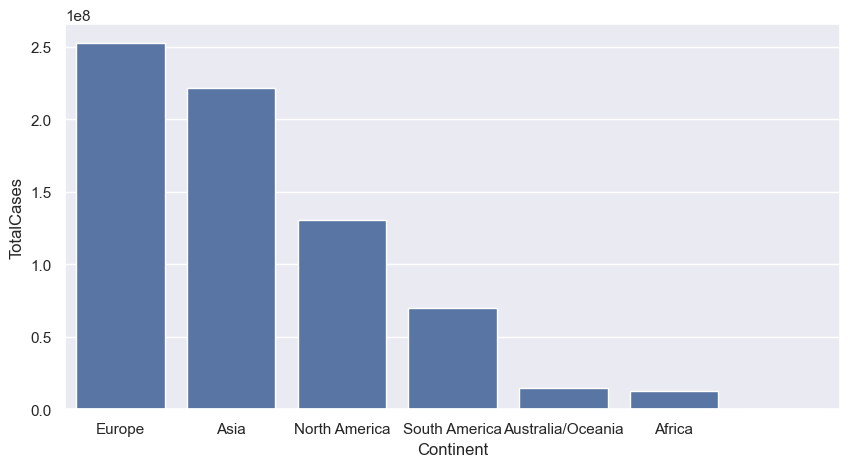

In [85]:
continent=Covid_Data.groupby(['Continent'],as_index=False)['TotalCases'].sum().sort_values(by='TotalCases',ascending=False)

#sns.set(rc={'figure.figsize':(10,5)})
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Continent',y='TotalCases',data=continent)
plt.show()

As we can see from above graph the 'EUROPE' Continent has more Covid cases as compared to other continent

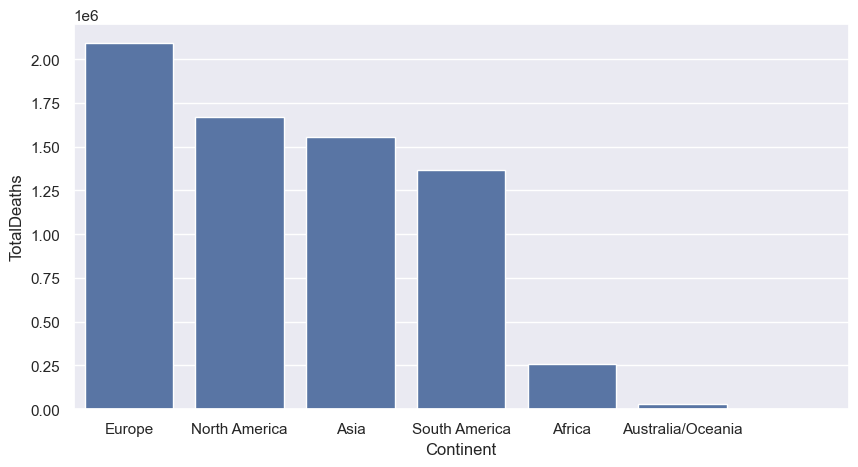

In [97]:
continent=Covid_Data.groupby(['Continent'],as_index=False)['TotalDeaths'].sum().sort_values(by='TotalDeaths',ascending=False)

#sns.set(rc={'figure.figsize':(10,5)})
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Continent',y='TotalDeaths',data=continent)
plt.show()

From above graph we can clearly see that the 'Europe' Continent recorded the most covid death cases apart from other continent after that the 2nd continent with most covid death cases is 'North America'.

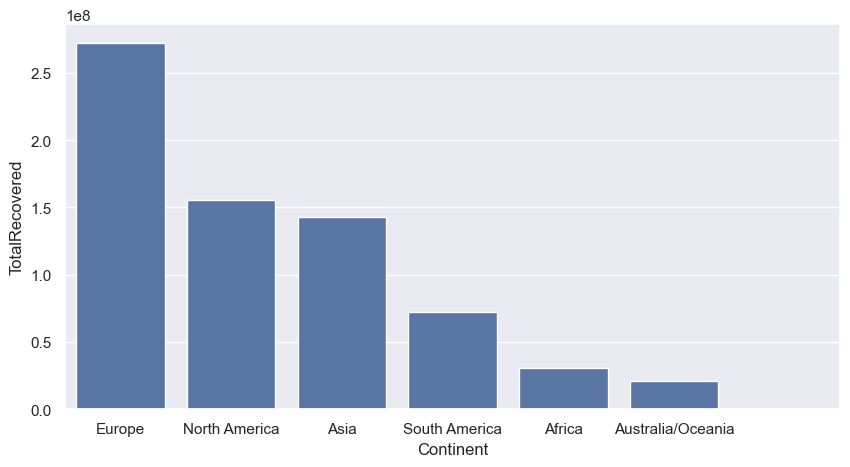

In [98]:
continent=Covid_Data.groupby(['Continent'],as_index=False)['TotalRecovered'].sum().sort_values(by='TotalRecovered',ascending=False)

#sns.set(rc={'figure.figsize':(10,5)})
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Continent',y='TotalRecovered',data=continent)
plt.show()

Apart from most death cases in 'Europe' continent it also has 'Most Recovered Cases'.

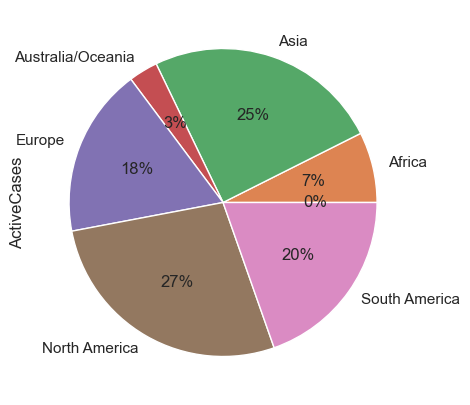

In [109]:
Covid_Data.groupby(['Continent']).sum().plot(kind='pie',y='ActiveCases',autopct='%1.0f%%')
plt.legend().set_visible(False)# To remove legends
plt.show()

From above graph we can say that 'North America ' continent has most Active Cases percent after that we can see 'Asia' continent with second-highest percent in terms of Active-Cases

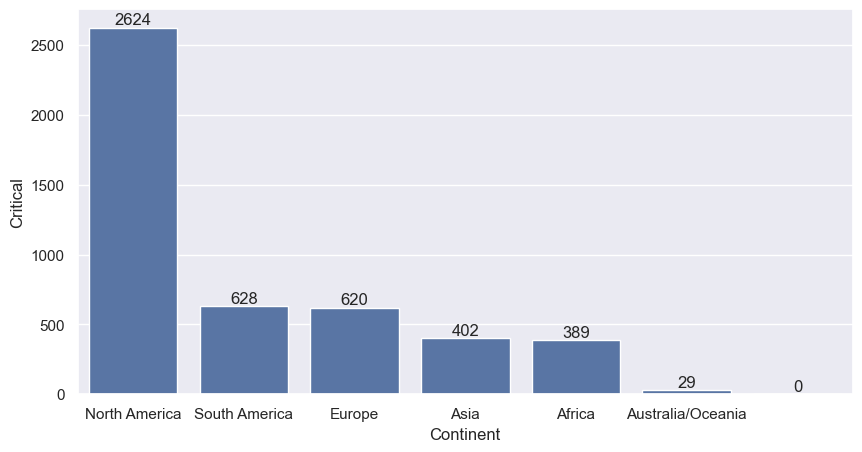

In [113]:
critical=Covid_Data.groupby(['Continent'],as_index=False)['Critical'].sum().sort_values(by='Critical',ascending=False)

plt.figure(figsize=(10,5))
ax=sns.barplot(data=critical,x='Continent',y='Critical')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

From above graph we can see that 'North America' Continent has most number of critical patients whereas the other continents critical cases are very low as compared to north america.

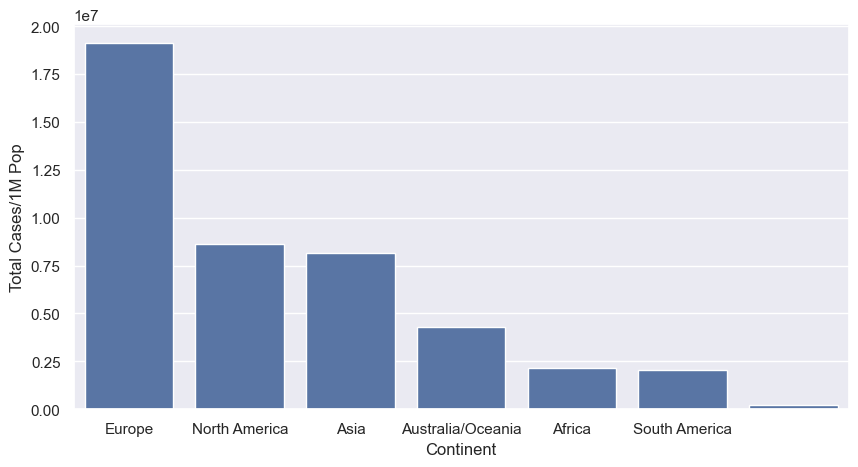

In [122]:
continent=Covid_Data.groupby(['Continent'],as_index=False)['Total Cases/1M Pop'].sum().sort_values(by='Total Cases/1M Pop',ascending=False)

plt.figure(figsize=(10,5))
ax=sns.barplot(x='Continent',y='Total Cases/1M Pop',data=continent)
plt.show()

Here we have the graph on Total cases/1M Population where 'Europe' Continent has most number of Covid Cases/1M Population   

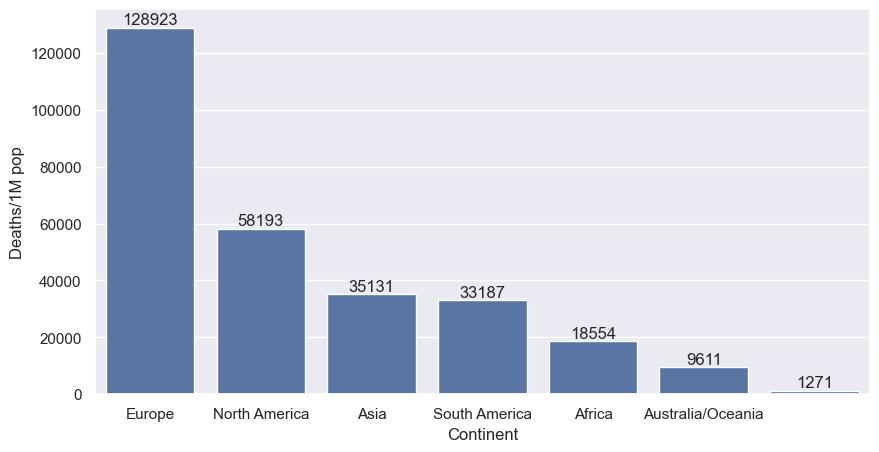

In [124]:
Deaths= Covid_Data.groupby(['Continent'],as_index=False)['Deaths/1M pop'].sum().sort_values(by='Deaths/1M pop',ascending=False)

plt.figure(figsize=(10,5))
ax=sns.barplot(data=Deaths,x='Continent',y='Deaths/1M pop')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

From above graph we can say that 'Europe' continent has most number of Death Cases/1M Population

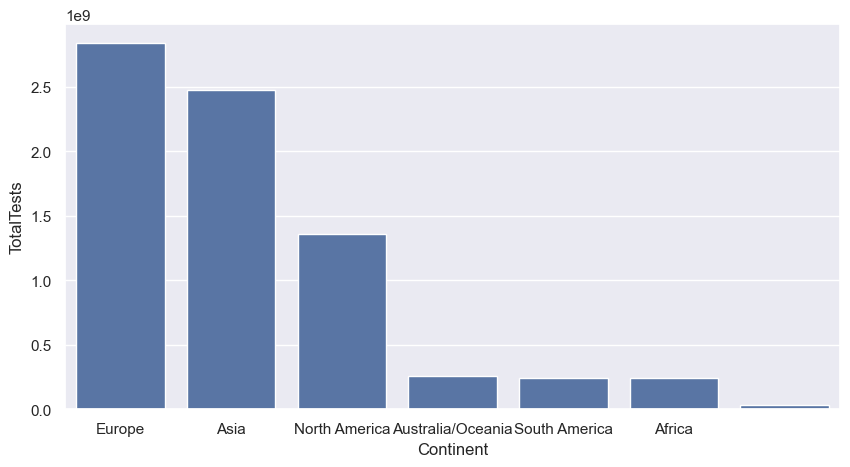

In [125]:
TotalTests=Covid_Data.groupby(['Continent'],as_index=False)['TotalTests'].sum().sort_values(by='TotalTests',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(data=TotalTests,x='Continent',y='TotalTests')
plt.show()

'European' continent has done most number of covid test as compared to other continent

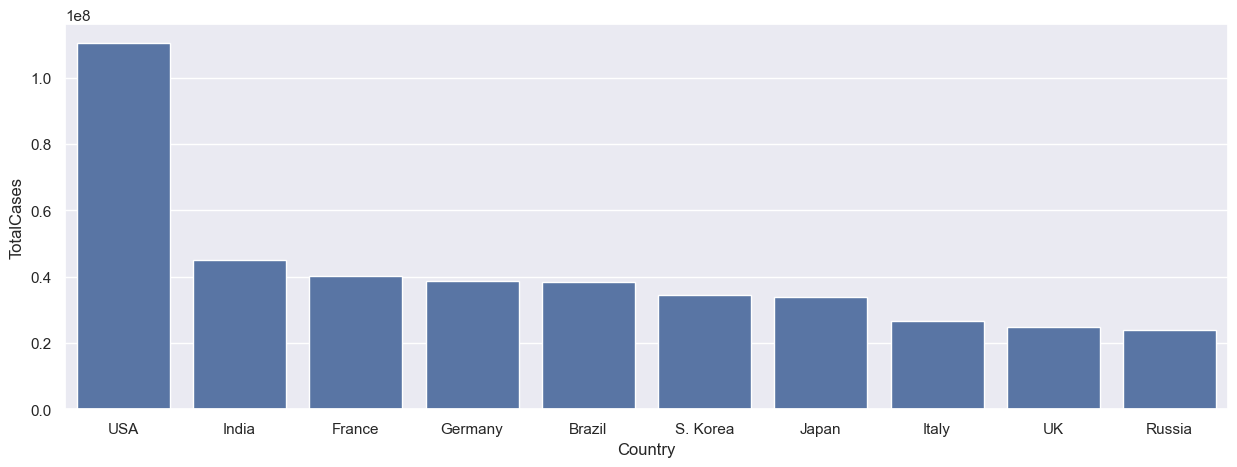

In [128]:
country=Covid_Data.groupby(['Country'],as_index=False)['TotalCases'].sum().sort_values(by='TotalCases',ascending=False).head(10)

#sns.set(rc={'figure.figsize':(15,5)})
plt.figure(figsize=(15,5))
sns.barplot(data=country,x='Country',y='TotalCases')
plt.show()

From above graph we can say that 'USA' has most number of cases.

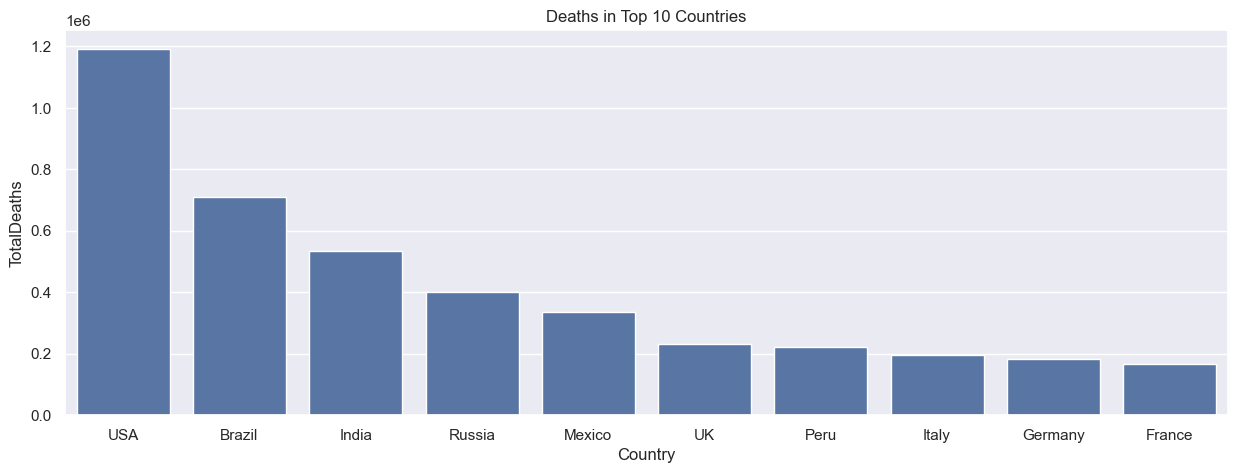

In [130]:
CountryDeaths=Covid_Data.groupby(['Country'],as_index=False)['TotalDeaths'].sum().sort_values(by='TotalDeaths',ascending=False).head(10)

plt.figure(figsize=(15,5))
sns.barplot(data=CountryDeaths,x='Country',y='TotalDeaths')
plt.title('Deaths in Top 10 Countries')
plt.show()

Also with most number of cases in world 'USA' also recorded most covid deaths after that we have 'Brazil' with second most covid deaths.

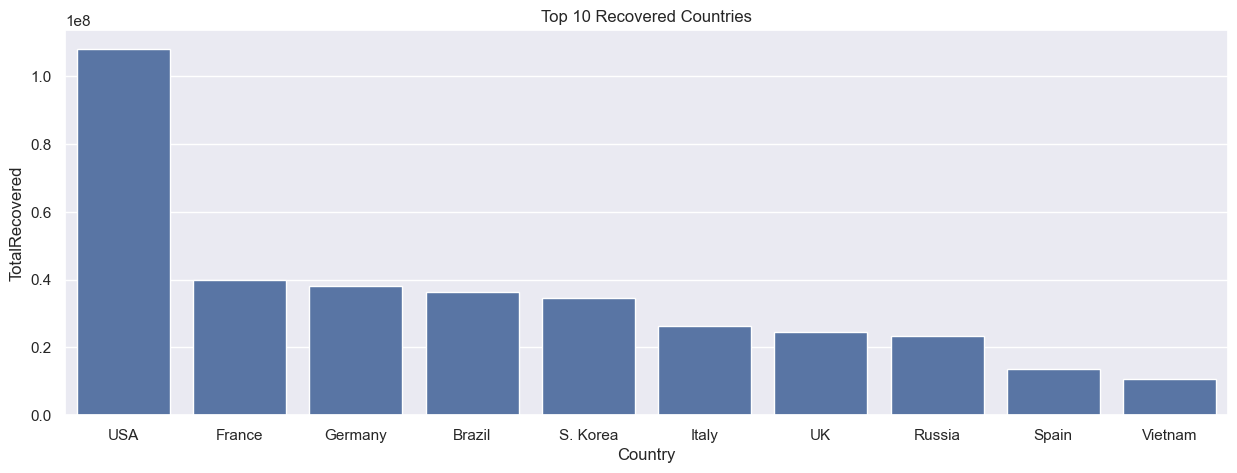

In [131]:
countryrecovered=Covid_Data.groupby(['Country'],as_index=False)['TotalRecovered'].sum().sort_values(by='TotalRecovered',ascending=False).head(10)

plt.figure(figsize=(15,5))
sns.barplot(data=countryrecovered,x='Country',y='TotalRecovered')
plt.title('Top 10 Recovered Countries')
plt.show()

'USA' also has most number of recovered cases 

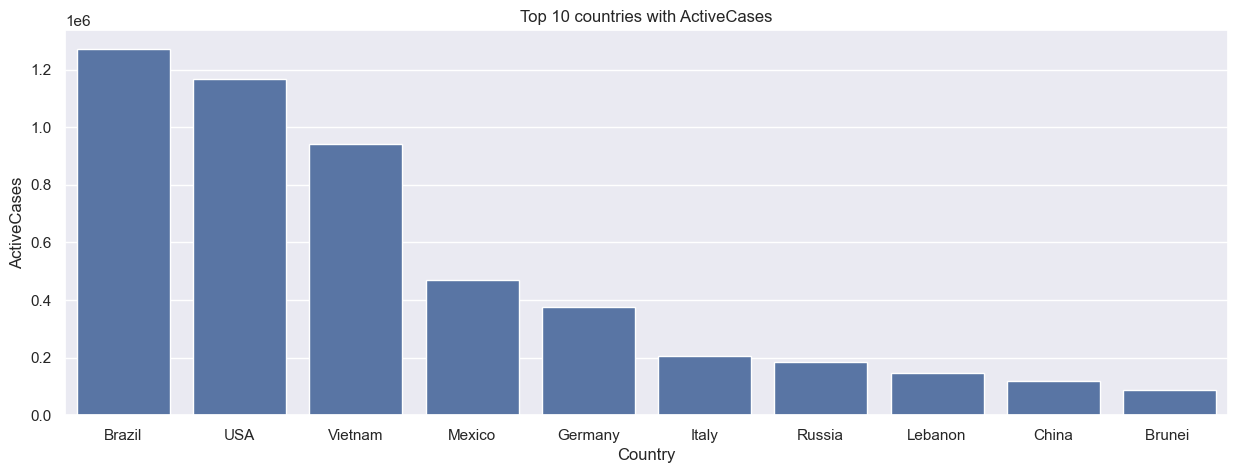

In [132]:
countryactivecases=Covid_Data.groupby(['Country'],as_index=False)['ActiveCases'].sum().sort_values(by='ActiveCases',ascending=False).head(10)

plt.figure(figsize=(15,5))
sns.barplot(data=countryactivecases,x='Country',y='ActiveCases')
plt.title('Top 10 countries with ActiveCases')
plt.show()

Countries with most number active cases are 'Brazil' after that we have 'USA'.

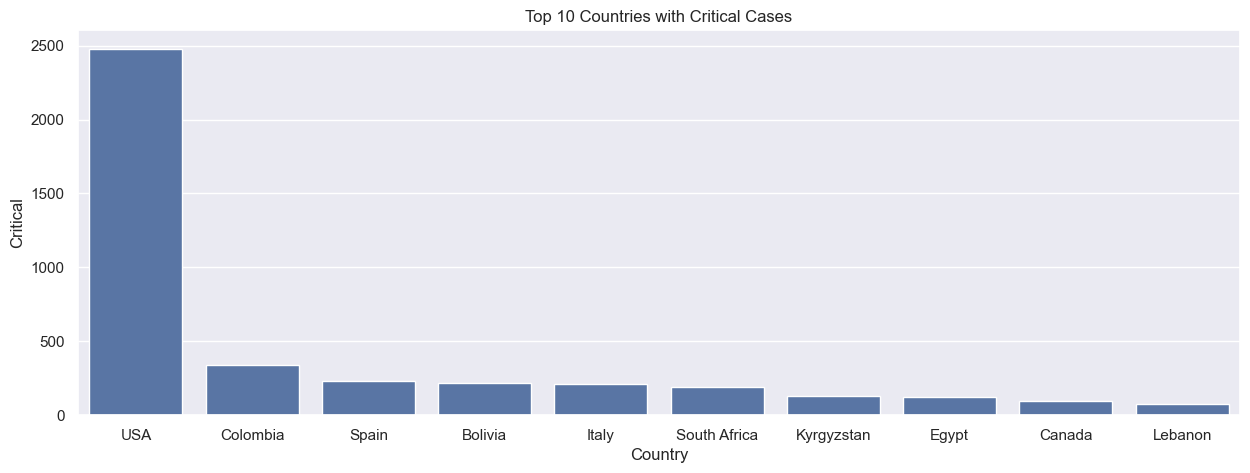

In [133]:
criticalcases=Covid_Data.groupby(['Country'],as_index=False)['Critical'].sum().sort_values(by='Critical',ascending=False).head(10)

plt.figure(figsize=(15,5))
sns.barplot(data=criticalcases,x='Country',y='Critical')
plt.title('Top 10 Countries with Critical Cases')
plt.show()

From above graph we can say that 'USA' has most number of critical covid cases.

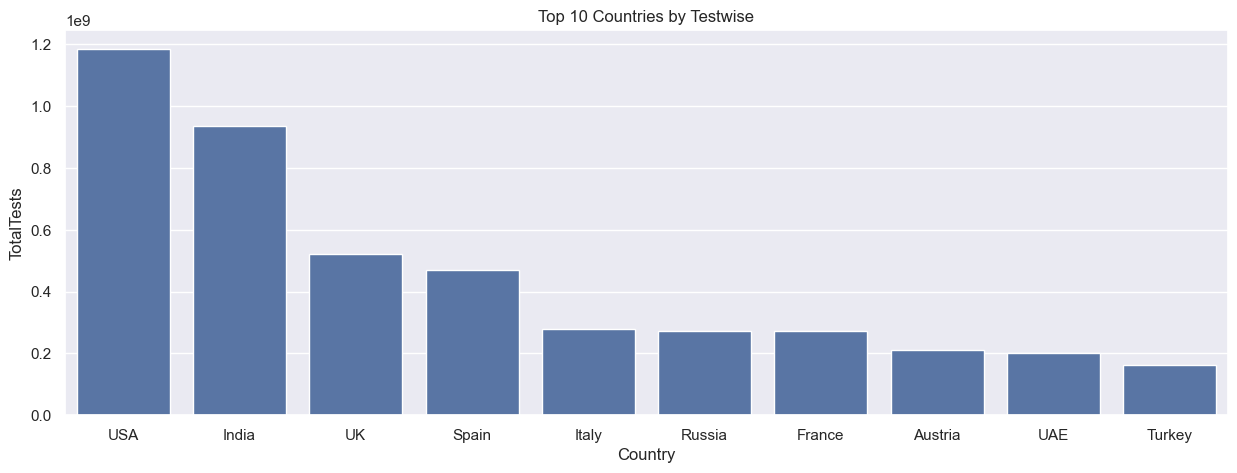

In [134]:
countrytotaltests=Covid_Data.groupby(['Country'],as_index=False)['TotalTests'].sum().sort_values(by='TotalTests',ascending=False).head(10)

plt.figure(figsize=(15,5))
sns.barplot(data=countrytotaltests,x='Country',y='TotalTests')
plt.title('Top 10 Countries by Testwise')
plt.show()

'USA' has done most number of Covid Test after that India has most number of Covid test.

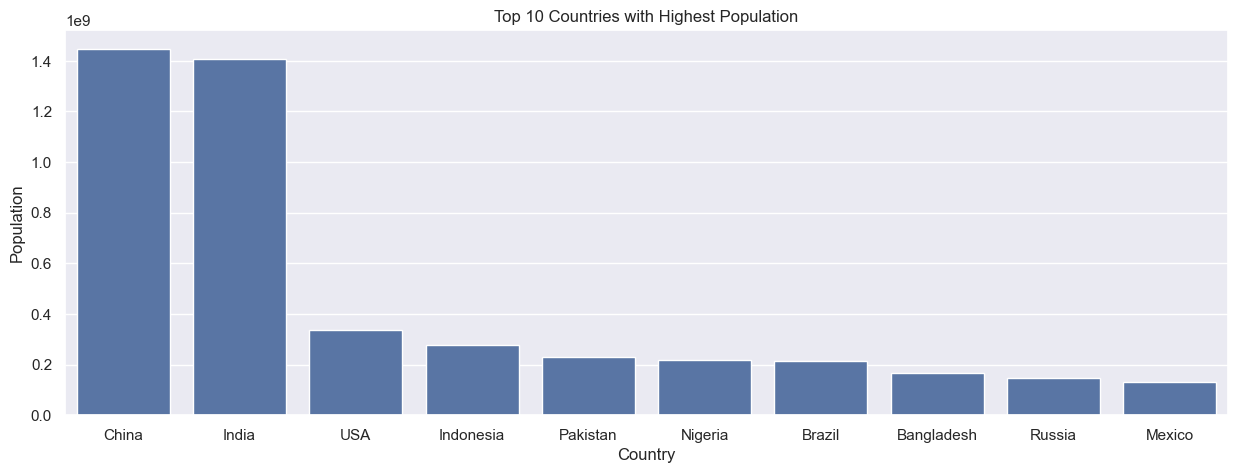

In [136]:
country=Covid_Data.groupby(['Country'],as_index=False)['Population'].sum().sort_values(by='Population',ascending=False).head(10)

#sns.set(rc={'figure.figsize':(15,5)})
plt.figure(figsize=(15,5))
sns.barplot(data=country,x='Country',y='Population')
plt.title('Top 10 Countries with Highest Population')
plt.show()

In terms of Population 'China' has more population in world after that slightly low India with second most populated country.